In [4]:
import os

In [ ]:
import tarfile

In [ ]:
import urllib

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [5]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [ ]:
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [7]:
import pandas as pd

In [8]:
def load_housting_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [13]:
housing = load_housting_data()

In [ ]:
housing.head()

In [ ]:
housing.info()

In [ ]:
housing["ocean_proximity"].value_counts()

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [ ]:
housing.hist(bins=50, figsize=(20,15))

In [ ]:
plt.show()

In [14]:
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
len(train_set)

In [ ]:
len(test_set)

In [ ]:
train_set

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

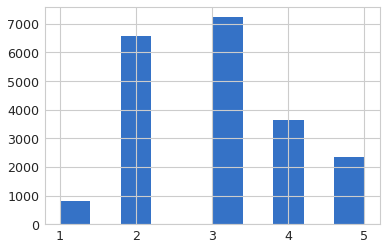

In [18]:
housing["income_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
len(strat_test_set), len(strat_train_set)

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
housing = strat_train_set.copy()

In [ ]:
housing

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

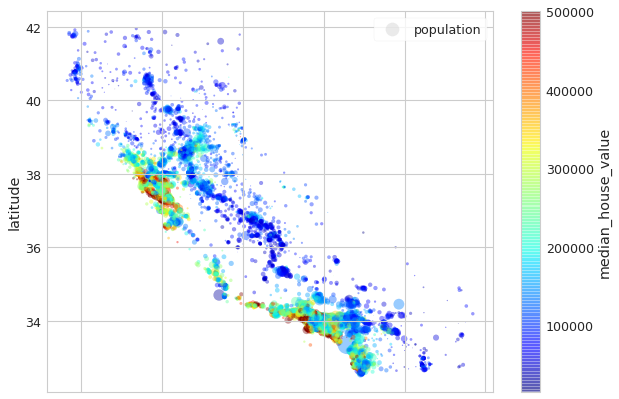

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

No handles with labels found to put in legend.


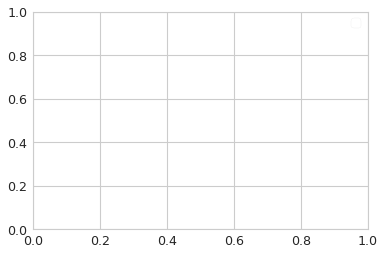

In [23]:
plt.legend()

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe46418f5c0>,
      dtype=object)

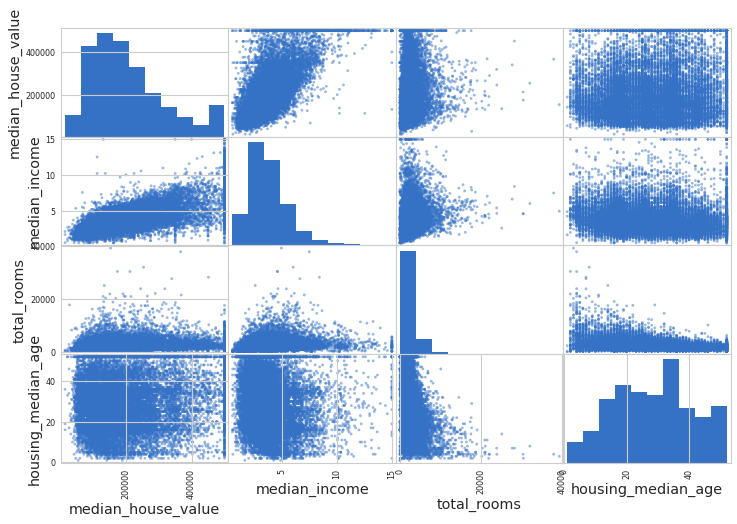

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))


In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [30]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

In [31]:
housing["poplulation_per_household"] = housing["population"]/housing["households"]

In [32]:
housing["rooms_per_household"]

17606    4.625369
18632    6.008850
14650    4.225108
3230     5.232295
3555     4.505810
           ...   
6563     6.052381
12053    4.635659
13908    6.346405
11159    5.505618
15775    4.843505
Name: rooms_per_household, Length: 16512, dtype: float64

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_household          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
poplulation_per_household   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_room           -0.259984
Name: median_house_value, dtype: float64